In [16]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import datetime
import random

In [17]:
def MakeDataFromText(filepath):
    """
    Helper function to parse text files in IFM proprietary format.
    """
    with open(filepath, 'r') as file:
        reader = csv.reader(file)

        db = dict()                          # Dictionary that will hold k,v pairs of 
        recent_EPC = ''                      # The most recent EPC that was read, and data is being assigned to
        Time_Or_Data = True                  # Time is true, Data is false
        reached_24 = False

        for l in reader:                     # Iterate over entire text file
            line = l[0]                      # Each line only has one token, so we select it
            
            if len(line)==24:                # If it is an EPC
                db[line] = [[],[]]           # Create new k,v pair in database
                recent_EPC = line            # Current EPC to add to is selected
            
            elif line == '[':                # If start bracket, beginning to collect an array of data
                data = []

            elif line == ']':                # End bracket means end of data array
                if len(data)!=0:
                    if Time_Or_Data:
                        db[recent_EPC][0] = data
                        Time_Or_Data = False
                    else:
                        db[recent_EPC][1] = data
                        Time_Or_Data = True
                data = []

            elif len(line)==8:               # If it is a time stamp
                h,m,s = line.split(':')      # Parse timestamp into hours, minutes, seconds

                if int(h)==23:
                    reached_24 = True        # If end of day reached, must move to Day 2

                if reached_24 and int(h) < 12:
                    day=2
                else:
                    day=1

                data.append(datetime.datetime(1900, 1, day,int(h) - 3,int(m),int(s))) # Minus 3 for Pacific Time
            
            elif line ==' ':               # If blank space, then we skip to parse next line
                pass

            else:                          # If it is a data point
                try:
                    data.append(float(line))
                except:
                    pass                   # Error catching case just in case, so annoying errors don't crash program
    return db

In [18]:
class Person:
    """
    Class to represent each individal poutfit being recorded during Deployment, made up of garments.
    """
    def __init__(
        self, Name:str, color:str,
        backneck:str,   back:str,        chest:str, 
        leftab:str,     rightab:str, 
        rightuparm:str, rightlowarm:str, 
        leftuparm:str,  leftlowarm:str, 
        beanie1:str,    beanie2:str,     beanie3:str, beanieR:str, beanieL:str
    ):
        self.Backneck    = backneck        # Tag ID's for the shirt
        self.Back        = back
        self.Chest       = chest
        self.Leftab      = leftab
        self.Rightab     = rightab
        self.Rightuparm  = rightuparm
        self.Rightlowarm = rightlowarm
        self.Leftuparm   = leftuparm
        self.Leftlowarm  = leftlowarm
        self.Beanie1     = beanie1         # Tag ID's for the beanies
        self.Beanie2     = beanie2
        self.Beanie3     = beanie3
        self.BeanieR     = beanieR
        self.BeanieL     = beanieL

        self.Name = Name                   # Soldier's Name

        self.ShirtMapping = {
            self.Backneck:    Name + " Back Neck",
            self.Back:        Name + " Back",
            self.Chest:       Name + " Chest",
            self.Leftab:      Name + " Left Abdomen",
            self.Rightab:     Name + " Right Abdomen",
            self.Rightuparm:  Name + " Right Upper Arm",
            self.Rightlowarm: Name + " Right Lower Arm",
            self.Leftlowarm:  Name + " Left Lower Arm",
            self.Leftuparm:   Name + " Left Upper Arm",
        }

        self.TagList = [
            self.Backneck,   self.Back, self.Chest,
            self.Leftab,     self.Rightab,
            self.Rightuparm, self.Rightlowarm,
            self.Leftuparm,  self.Leftlowarm,
            self.Beanie1,    self.Beanie2, self.Beanie3, self.BeanieR, self.BeanieL
        ]

        self.BeanieList = [self.Beanie1, self.Beanie2, self.Beanie3, self.BeanieR, self.BeanieL]
        self.Color = color

In [19]:
# Paul P, only wet
person6  = Person("Paul P.", "#de0413", "71BB", "7705", "B25E", "3247", "A9B5", "6C38", "7662", "A983", "098F", "B644", "7BCC", "B576", "70D1", "4D84");

# Joelle, only wet
person14 = Person("Joelle", "#9e05a1", "462C", "5B60", "7415", "6310", "1851", "616A", "5DAA", "6D28", "9991", "3B0E", "5374", "682C", "0A50", "1543");

# Garrett C, only wet
person28 = Person("Garrett C.", "#0909eb", "8977", "4EB3", "AA5E", "6626", "9ABE", "6CD0", "AB8E", "14AA", "6E94", "895D", "571F", "2D68", "8121", "198C");

# Dennis, only wet
person2  = Person("Dennis", "#078c26", "333B", "289B", "2473", "231D", "9879", "4067", "5FB6", "169E", "8D50", "74C4", "73DC", "DC4A", "884D", "1BA4");

# Brent, only wet
person17 = Person("Brent L.", "#e8c100", "6CC7", "8FB7", "799D", "6F8D", "6332", "5A1E", "92A5", "4A3D", "3EC9", "16AB", "A66C", "6162", "A686", "7E1B");

# Jackson, wet and dry
person15 = Person("Jackson Wet", "#0c008f", "9C54", "9968", "65E1", "5E23", "ACB3", "7AD3", "99A1", "B19D", "43C6", "7DCB", "9D35", "6FD0", "34CE", "62E3");
person11 = Person("Jackson Dry", "#3845ff", "2A1B", "238C", "731F", "9591", "5C98", "5F06", "4526", "461C", "5253", "B078", "3AC7", "566B", "65D4", "432B");

# Matt C, wet and dry
person16 = Person("Matt C. Wet", "#02591e", "959E", "1C5F", "5A59", "077A", "902A", "3B60", "8199", "4469", "813A", "B7A4", "5163", "4DA5", "8995", "7972");
person8  = Person("Matt C. Dry", "#00ed4f", "1B6A", "0D42", "7AD4", "20AF", "493F", "404A", "6878", "1A3B", "546F", "194B", "3133", "A847", "0D50", "7A61");

# William D, wet and dry
person13 = Person("William D. Wet", "#a60000", "A033", "A0C0", "892F", "627F", "6BD9", "3DB0", "8C97", "4ECF", "A73C", "90AE", "78D3", "82D8", "312D", "2A29");
person10 = Person("William D. Dry", "#ff3037", "366C", "A08B", "AC42", "9AC9", "B53F", "76A4", "5E76", "68AE", "41D6", "803F", "5757", "9E54", "----", "----");

# Sean, wet and dry
person32 = Person("Sean Wet", "#7d0080", "2990", "1EC3", "51E2", "3783", "AE5E", "4575", "0688", "A0B0", "1BA6", "3C3E", "1989", "7C2C", "42D7", "6129");
person31 = Person("Sean Dry", "#fb24ff", "1CAE", "7764", "8F24", "AD3E", "8898", "413F", "097A", "18A8", "4258", "7F4E", "801E", "8651", "AAB4", "6CB5");

# Harold, wet and dry
person19 = Person("Harold Wet", "#003952", "697F", "78A5", "5D0E", "7EC6", "AE59", "8158", "4A9B", "1D44", "2122", "5C02", "2D90", "6DAB", "3374", "B1AB");
person21 = Person("Harold Dry", "#008dc9", "8CB4", "4115", "4D74", "4883", "4C9F", "ABB7", "7938", "390F", "21A5", "A697", "7C7D", "B689", "114D", "047A");

# Katherina, wet and dry
person26 = Person("Katherina Wet", "#965500", "4813", "2791", "1F7A", "6F4A", "2383", "2F66", "2E5C", "926A", "2E56", "158F", "5B06", "B28A", "73C6", "819C");
person22 = Person("Katherina Dry", "#ed8600", "4F0D", "90D5", "0874", "45CE", "6CAC", "3EB2", "A26F", "888C", "50C3", "3767", "664F", "36A4", "2759", "BB8B");

In [20]:
t1 = MakeDataFromText("MWTC/trevor_test_1.txt")
t2 = MakeDataFromText("MWTC/trevor_test_2.txt")
t3 = MakeDataFromText("MWTC/trevor_test_3.txt")
t4 = MakeDataFromText("MWTC/trevor_test_4.txt")
t5 = MakeDataFromText("MWTC/trevor_test_5.txt")
t6 = MakeDataFromText("MWTC/trevor_test_6.txt")
t7 = MakeDataFromText("MWTC/trevor_test_7.txt")
t8 = MakeDataFromText("MWTC/trevor_test_8.txt")
y1 = MakeDataFromText("MWTC/yoel_test_1.txt")
y2 = MakeDataFromText("MWTC/yoel_test_2.txt")
y3 = MakeDataFromText("MWTC/yoel_test_3.txt")
y4 = MakeDataFromText("MWTC/yoel_test_4.txt")

In [21]:
personlist = [
    person6, person14, person15, person11, person6, person8, 
    person28, person13, person10, person2, person32, 
    person31, person17, person19, person21, person26, person22
]

wetonly = [
    person6, person14, person28, person2, person17
]

wetanddry = [
    person15, person11, person6, person8, 
    person13, person10, person32, 
    person31, person19, person21, person26, person22
]

In [22]:
combined = dict()

for d in [t1, t2, t3, t4, t5, t6, t7, t8, y1, y2, y3, y4]:

    for k,v in d.items():
        if k in combined: # if tag is already in dict
            
            for i in range(len(v[0])):
                if v[0][i] in combined[k]:
                    combined[k][v[0][i]].append(v[1][i])
                else:
                    combined[k][v[0][i]] = [v[1][i]]
        
        else: # if tag is not in dict
            combined[k] = dict()
            for i in range(len(v[0])):
                combined[k][v[0][i]] = [v[1][i]]

for k,v in combined.items():
    for k2,v2 in v.items():
        combined[k][k2] = sum(v2)/len(v2)

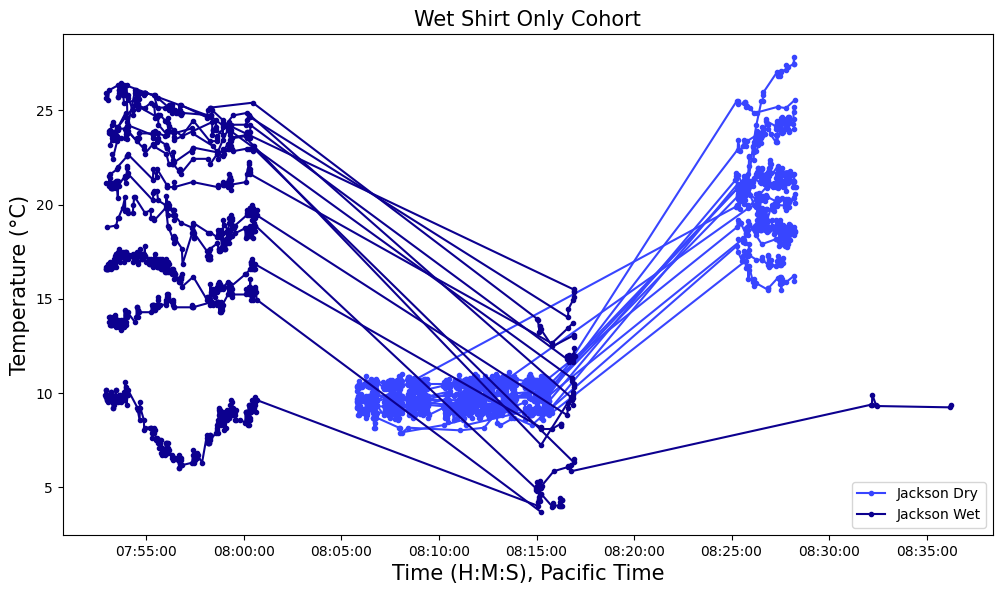

In [23]:
import matplotlib.dates as mdates
myFmt = mdates.DateFormatter('%H:%M:%S')
fig, ax = plt.subplots(figsize=(12, 6.5))
ax.xaxis.set_major_formatter(myFmt)


for k,v in combined.items():
    id = k[-4:]

    # for p in [person2, person28]:
    for p in [person15, person11]:
        if id in p.TagList:
            s = sorted(v.items())
            x = [i[0] for i in s if i[0]>datetime.datetime(1900, 1, 1, 7, 39, 0)]
            y = [i[1] for i in s if i[0]>datetime.datetime(1900, 1, 1, 7, 39, 0)]
            # x = [i[0] for i in s]
            # y = [i[1] for i in s]
            plt.plot(x, y, label=p.Name, color=p.Color, marker=".")

ax.set_ylabel("Temperature (°C)", fontsize=15)
ax.set_xlabel("Time (H:M:S), Pacific Time", fontsize=15)
ax.set_title("Wet Shirt Only Cohort", fontsize=15)
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
ax.legend(by_label.values(), by_label.keys(), loc="lower right")

In [24]:
# import matplotlib.dates as mdates
# myFmt = mdates.DateFormatter('%H:%M:%S')

# # fig, ax = plt.subplots(figsize=(13, 9))
# fig, ax = plt.subplots(figsize=(13, 9))
# ax.xaxis.set_major_formatter(myFmt)


# for d in [t1, t2, t3, t4, t5, t6, t7, t8, y1, y2, y3, y4]:
#     for k,v in d.items():

#         id = k[-4:]

#         for i in range(len(wetonly)):
#             if id in wetonly[i].TagList:

#                 if len(v[1])>0:
#                     ax.plot(v[0], v[1], label=wetonly[i].Name, linewidth=1.25, marker=".", color=wetonly[i].Color)
#                 break

# ax.set_ylabel("Temperature (°C)", fontsize=15)
# ax.set_xlabel("Time (H:M:S), Eastern Time", fontsize=15)
# ax.set_title("The Five Wet Shirt Only Subjects", fontsize=15)
# ax.set_ylim(-5.0, 35.0)
# ax.set_yticks(ticks=[15,17.5,20.0,22.5,25.0,27.5,30.0,32.5,35.0,37.5,40.0], fontsize=15)

# handles, labels = plt.gca().get_legend_handles_labels()
# by_label = dict(zip(labels, handles))
# ax.legend(by_label.values(), by_label.keys(), loc="lower left")